In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las constantes
g = 9.8 # gravedad [m/s^2]
p_atm = 101325 # Presión atmosférica [Pa]
beta = 3.67e-3 # Coeficiente de expansion termica [1/K]
T_w = 80.0 + 273.0 # Temperatura de la pared [K]
T_a = 20.0 + 273.0 # Temperatura ambiente [K]
delta_T = T_w - T_a
T_f = (0.92 * T_a + 0.08 * T_w) 
lambda_f = 0.04 # Coeficiente de friccion [adimensional]
R = 10.0 # Radio de la tuberia [m]
L = 100.0 # Longitud de la tuberia [m]
alpha = 2.2e-5 # Coeficiente de difusividad [m^2/s]
rho_0 = 1.0 # Densidad [kg/m^3]
Cp = 1.012 # Capacidad calorifica [J/(kg K)]
k = 0.024 # Conductividad termica [W/(m K)]
nu = 1.71e-5 # Viscosidad [Pa s]
Ra_D = (g * beta * delta_T * (2 * R)**3)/ nu**2 # Numero de Rayleigh
Nu = (576/(Ra_D * 2 * R /L)**2 + 2.873/(Ra_D * 2 * R /L)**(1/2))**(-1/2)# Numero de Nusselt
h_v = (k * Nu)/ (2 * R * L) # coeficiente de tranferencia de calor por convección [W/(m^3 K)]
theta_r = (T_w - T_a)/(T_f - T_a)
LAMBDA = (lambda_f * L) / (8 * R)
u_c = (rho_0 * g * Cp * beta * (T_f - T_a))/(h_v * (1/2 + (lambda_f * L)/ (8 *R))) #  = u_e velocidad en el estado estacionario y se usa como velocidad caracteristica [m/s]
Pi_0 = (rho_0 * g * L) / p_atm 
Pi_d = (rho_0 * u_c**2) / p_atm
gamma = (h_v * L) / (rho_0 * Cp * u_c)
delta = alpha / (L * u_c)
t_c = L/ u_c # tiempo caracteristico [s]
phi = (L * g * beta) * (T_f - T_a) / u_c**2



In [19]:
print('T_f = ' + str(T_f))
print('h_v = ' + str(h_v))
print('Lambda = ' + str(LAMBDA))
print('u_e = ' + str(u_c))
print('Pi_0 = ' + str(Pi_0))
print('Pi_d = ' + str(Pi_d))
print('gamma = ' + str(gamma))
print('delta = ' + str(delta))
print('t_c = ' + str(t_c))
print('phi = ' + str(phi))
print('theta_r = ' + str(theta_r))

T_f = 297.8
h_v = 0.013123697793705775
Lambda = 0.05
u_e = 24.20443666055377
Pi_0 = 0.009671848013816927
Pi_d = 0.0057819368769282935
gamma = 0.05357728835290001
delta = 9.089242732037485e-09
t_c = 4.131473969107947
phi = 0.029467508594095016
theta_r = 12.49999999999997


In [35]:
# Definición de variables y condiciones iniciales
N = 25 # Número de puntos en la dirección temporal
M = 50 # Número de puntos en la dirección vertical
eta = np.linspace(0, 1, M)  # Coordenada vertical adimensional
tau = np.linspace(0, 1, N)  # Coordenada temporal adimensional
deta = (eta[-1] - eta[0]) / M
dtau = (tau[-1] - tau[0]) / N
dtau_eta = dtau / deta
dtau_eta2 = dtau /deta**2
v = np.zeros(N)  # Velocidad adimensional
theta = np.zeros((N, M))  # Temperatura adimensional
Pi = np.zeros((N, M))  # Presión adimensional

# Condiciones iniciales
v[0] = 0.0  # Velocidad inicial cero
theta[0, :] = 0.0  # Temperatura inicial uniforme
Pi[0, :] = 1.0  # Presión inicial uniforme

# Simulación numérica
for i in range(N-1):
    for j in range(M-1):

         v[i+1] = v[i] + dtau_eta * ((-1/Pi_d) * ((Pi[i, j+1] - Pi[i, j])) 
                                              - phi * (theta[i, j] - theta_r) * (deta)
                                              - LAMBDA * v[i]**2) * (deta)
         
         theta[i+1, j] = theta[i, j] + dtau_eta2 * (- v[i+1] * ((theta[i, j+1] - theta[i, j]) * deta)
                                                              + delta * ((theta[i, j-1] - 2 * theta[i, j] + theta[i, j+1]))
                                                              - gamma * (theta[i, j] - theta_r) * deta**2)
         
         Pi[i+1, j] = 1 - 0.5 * Pi_d * v[i+1]**2 + Pi_0 * eta[j]



/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1118/4015600965.py:31: RuntimeWarning: overflow encountered in scalar power
  Pi[i+1, j] = 1 - 0.5 * Pi_d * v[i+1]**2 + Pi_0 * eta[j]
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1118/4015600965.py:27: RuntimeWarning: overflow encountered in scalar multiply
  theta[i+1, j] = theta[i, j] + dtau_eta2 * (- v[i+1] * ((theta[i, j+1] - theta[i, j]) * deta)
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1118/4015600965.py:23: RuntimeWarning: invalid value encountered in scalar subtract
  v[i+1] = v[i] + dtau_eta * ((-1/Pi_d) * ((Pi[i, j+1] - Pi[i, j]))
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1118/4015600965.py:25: RuntimeWarning: overflow encountered in scalar power
  - LAMBDA * v[i]**2) * (deta)
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1118/4015600965.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  theta[i+1, j] = theta[i, j] + dtau_eta2 * (- v[i+1] 

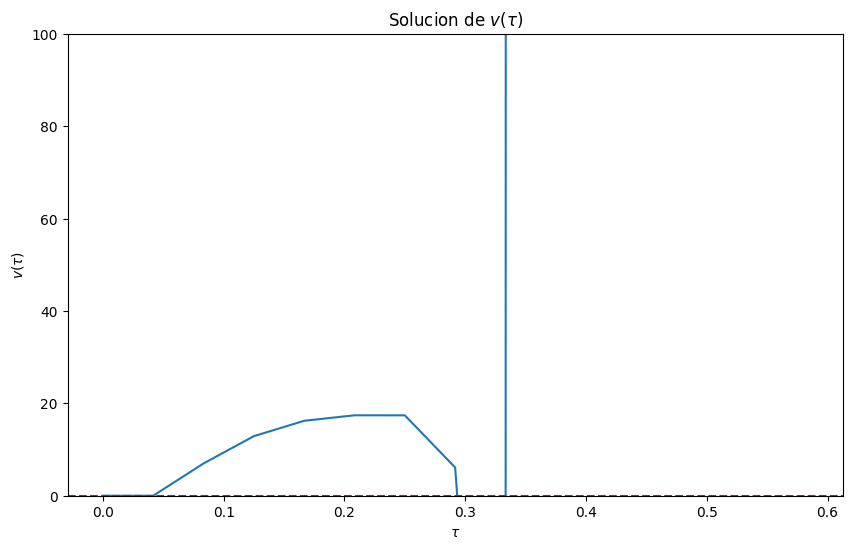

In [36]:
# Graficar la solucion de v(t)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(tau, v, label = r'$v(\tau)$')

# Agregar una linea horizontal en un valor especifico de x
x_linea = 0.01  # Valor de x donde se dibujará la linea horizontal
ax.axhline(y=0.01, color='r', linestyle='--', label = r'$v_0$')

ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$v(\tau)$')
ax.set_title('Solucion de '+r'$v(\tau)$')
ax.set_ylim(0,100)
#ax.legend()
plt.show()


In [27]:
v

array([ 0.00000000e+00,  1.84171929e-03,  1.74573887e+01,  1.81507584e+01,
        1.74729706e+01,  1.76482127e+01,  2.43257917e-01, -8.56573956e+00,
        4.28628698e+02,  3.54046531e+05])